# Welcome to Retail data analysis using Python.

1. Data Ingestion

In [269]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [270]:
uncleaned_data =  pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\Projects\dataset\Retail\retail_sales_dataset.csv", encoding='ANSI')

In [271]:
uncleaned_data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24/11/2023,CUST001,Male,34,Beauty,3,50.0,150.0
1,2,27/02/2023,CUST002,Female,26,Clothing,2,500.0,1000.0
2,3,13/01/2023,CUST003,Male,50,Electronics,1,30.0,30.0
3,4,21/05/2023,CUST004,Male,37,Clothing,1,500.0,500.0
4,5,06/05/2023,CUST005,Male,30,Beauty,2,50.0,100.0
...,...,...,...,...,...,...,...,...,...
995,996,16/05/2023,CUST996,Male,62,Clothing,1,50.0,50.0
996,997,17/11/2023,CUST997,Male,52,Beauty,3,30.0,90.0
997,998,29/10/2023,CUST998,Female,23,Beauty,4,25.0,100.0
998,999,05/12/2023,CUST999,Female,36,Electronics,3,50.0,150.0


In [272]:
uncleaned_data.shape

(1000, 9)

2. Data Cleaning

In [273]:
removed_null_values = pd.DataFrame(uncleaned_data.dropna())
removed_null_values.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24/11/2023,CUST001,Male,34,Beauty,3,50.0,150.0
1,2,27/02/2023,CUST002,Female,26,Clothing,2,500.0,1000.0
2,3,13/01/2023,CUST003,Male,50,Electronics,1,30.0,30.0
3,4,21/05/2023,CUST004,Male,37,Clothing,1,500.0,500.0
4,5,06/05/2023,CUST005,Male,30,Beauty,2,50.0,100.0


In [274]:
removed_null_values.shape

(1000, 9)

In [275]:
removed_duplicates = pd.DataFrame(removed_null_values.drop_duplicates())
removed_duplicates.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24/11/2023,CUST001,Male,34,Beauty,3,50.0,150.0
1,2,27/02/2023,CUST002,Female,26,Clothing,2,500.0,1000.0
2,3,13/01/2023,CUST003,Male,50,Electronics,1,30.0,30.0
3,4,21/05/2023,CUST004,Male,37,Clothing,1,500.0,500.0
4,5,06/05/2023,CUST005,Male,30,Beauty,2,50.0,100.0


In [276]:
removed_duplicates.shape

(1000, 9)

In [277]:
cleaned_data = removed_duplicates

In [278]:
cleaned_data.dtypes

Transaction ID        int64
Date                 object
Customer ID          object
Gender               object
Age                   int64
Product Category     object
Quantity              int64
Price per Unit      float64
Total Amount        float64
dtype: object

In [279]:
cleaned_data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [280]:
cleaned_data['Date'] = cleaned_data["Date"].astype('datetime64[ns]')
cleaned_data['Age'] = cleaned_data["Age"].astype('int')
cleaned_data['Price per Unit'] = cleaned_data["Price per Unit"].astype('float')
cleaned_data['Total Amount'] = cleaned_data["Total Amount"].astype('float')

In [281]:
cleaned_data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50.0,150.0
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500.0,1000.0
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30.0,30.0
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500.0,500.0
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50.0,100.0


In [282]:
cleaned_data[['year', 'month', 'day']] = cleaned_data['Date'].apply(lambda x: x.timetuple()[:3]).tolist()
cleaned_data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,month,day
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50.0,150.0,2023,11,24
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500.0,1000.0,2023,2,27
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30.0,30.0,2023,1,13
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500.0,500.0,2023,5,21
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50.0,100.0,2023,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50.0,50.0,2023,5,16
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30.0,90.0,2023,11,17
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25.0,100.0,2023,10,29
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50.0,150.0,2023,12,5


3. Exploratory data analysis

Questions to Explore:

- How does customer age and gender influence their purchasing behavior?
- Are there discernible patterns in sales across different time periods?
- Which product categories hold the highest appeal among customers?
- What are the relationships between age, spending, and product preferences?
- How do customers adapt their shopping habits during seasonal trends?
- Are there distinct purchasing behaviors based on the number of items bought per transaction?
- What insights can be gleaned from the distribution of product prices within each category?

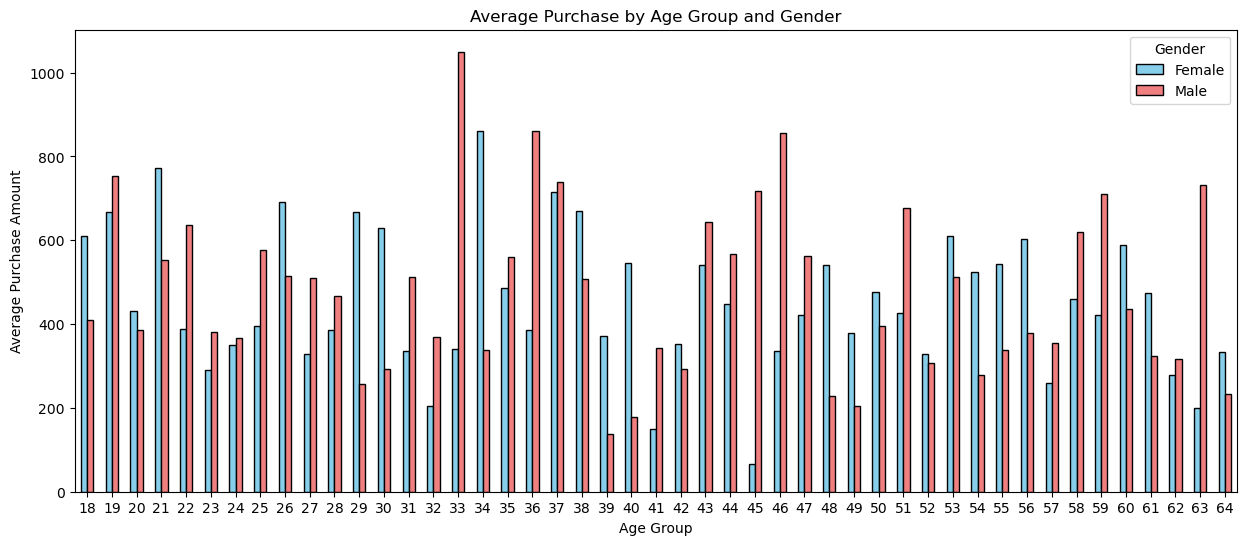

In [283]:
# How does customer age and gender influence their purchasing behaviour 
gender_age_group_avg = cleaned_data.groupby(['Age', 'Gender'])['Total Amount'].mean().unstack()
gender_age_group_avg.plot(kind='bar', figsize=(15, 6), color=['skyblue', 'lightcoral'], edgecolor='black')
plt.title('Average Purchase by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.legend(title='Gender')
plt.xticks(rotation=0)
plt.show()

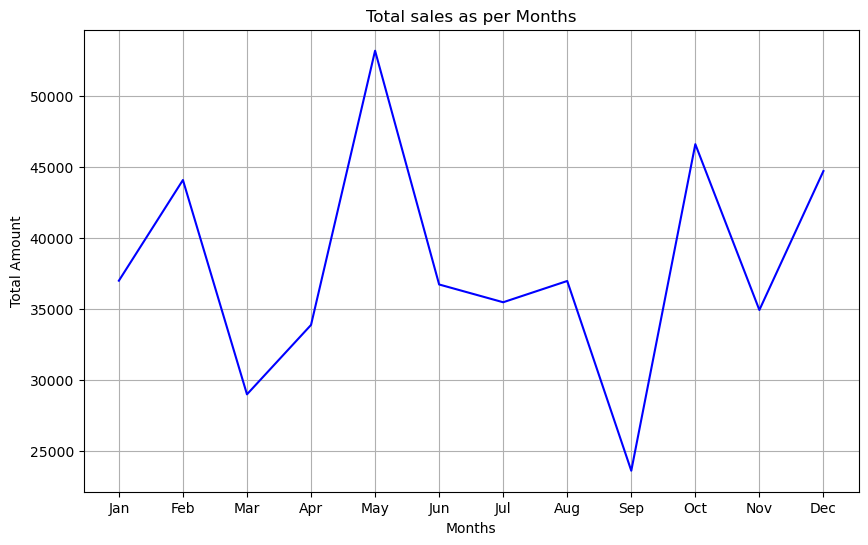

In [284]:
    # Are there discernible patterns in sales across different time periods?

sales_pattern = cleaned_data.groupby('month')['Total Amount'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='month',y='Total Amount',data=sales_pattern,color='blue')
plt.title("Total sales as per Months")
plt.xlabel("Months")
plt.ylabel("Total Amount")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()


In [285]:
cleaned_data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,month,day
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50.0,150.0,2023,11,24
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500.0,1000.0,2023,2,27
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30.0,30.0,2023,1,13
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500.0,500.0,2023,5,21
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50.0,100.0,2023,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50.0,50.0,2023,5,16
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30.0,90.0,2023,11,17
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25.0,100.0,2023,10,29
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50.0,150.0,2023,12,5


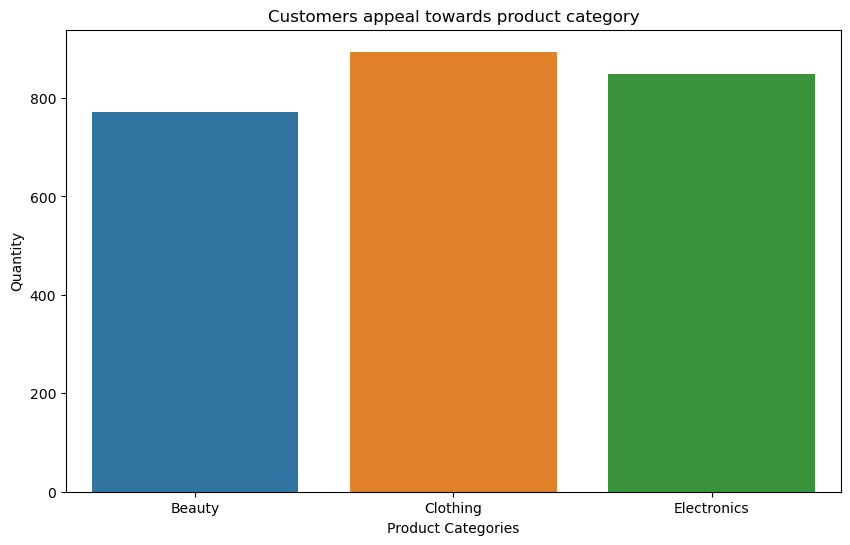

In [286]:
# Which product categories hold the highest appeal among customers?

highest_appeal_category = cleaned_data.groupby('Product Category')['Quantity'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(highest_appeal_category,x='Product Category',y='Quantity')
plt.title("Customers appeal towards product category")
plt.xlabel("Product Categories")
plt.ylabel("Quantity")
plt.show()

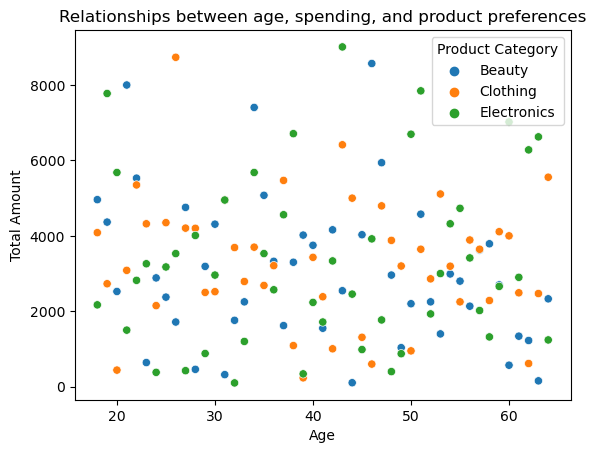

In [287]:
#  What are the relationships between age, spending, and product preferences?

age_spending_product =  cleaned_data.groupby(['Age','Product Category'])['Total Amount'].sum().reset_index()

sns.scatterplot(data=age_spending_product,x="Age",y='Total Amount',hue='Product Category')
plt.title("Relationships between age, spending, and product preferences")
plt.xlabel("Age")
plt.ylabel("Total Amount")
plt.show()

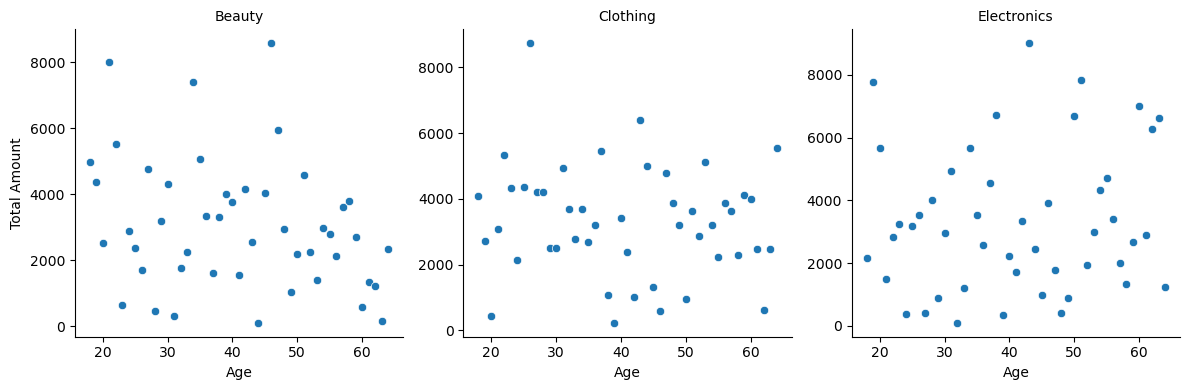

In [288]:
#  What are the relationships between age, spending, and product preferences?
g = sns.FacetGrid(age_spending_product, col="Product Category", col_wrap=3, height=4, sharey=False)
g.map(sns.scatterplot, "Age", "Total Amount")
g.set_titles("{col_name}")
g.set_axis_labels("Age", "Total Amount")
plt.show()


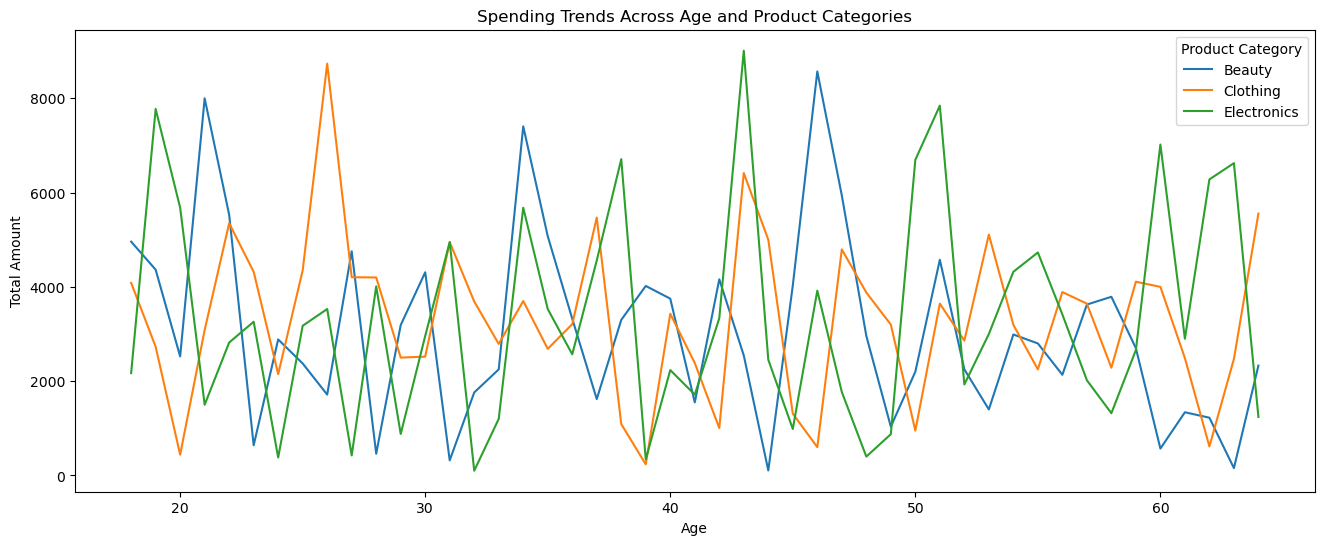

In [289]:
#  What are the relationships between age, spending, and product preferences?
plt.figure(figsize=(16,6))
sns.lineplot(data=age_spending_product, x="Age", y="Total Amount", hue="Product Category")
plt.title("Spending Trends Across Age and Product Categories")
plt.xlabel("Age")
plt.ylabel("Total Amount")
plt.show()


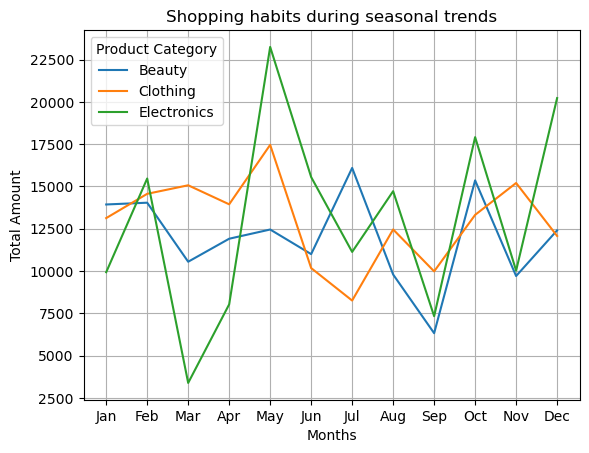

In [290]:
# How do customers adapt their shopping habits during seasonal trends?
seasonal_trends = cleaned_data.groupby(['month','Product Category'])['Total Amount'].sum().reset_index()

sns.lineplot(x='month',y='Total Amount',hue='Product Category',data=seasonal_trends,color='blue')
plt.title("Shopping habits during seasonal trends")
plt.xlabel("Months")
plt.ylabel("Total Amount")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

In [291]:
cleaned_data

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,year,month,day
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50.0,150.0,2023,11,24
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500.0,1000.0,2023,2,27
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30.0,30.0,2023,1,13
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500.0,500.0,2023,5,21
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50.0,100.0,2023,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50.0,50.0,2023,5,16
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30.0,90.0,2023,11,17
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25.0,100.0,2023,10,29
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50.0,150.0,2023,12,5


In [292]:
# Are there distinct purchasing behaviors based on the number of items bought per transaction?

transaction_data = cleaned_data.groupby('Transaction ID').agg({
    'Quantity' : 'sum',
    'Total Amount' : 'sum',
    'Product Category' : 'nunique'
}).reset_index()

transaction_data.rename(columns={
    'Quantity':'Total Items',
    'Total Amount': 'Total Spending',
    'Product Category' : 'Unique Category'
}, inplace=True)

transaction_data

,Transaction ID,Total Items,Total Spending,Unique Category
0,1,3,150.0,1
1,2,2,1000.0,1
2,3,1,30.0,1
3,4,1,500.0,1
4,5,2,100.0,1
...,...,...,...,...
995,996,1,50.0,1
996,997,3,90.0,1
997,998,4,100.0,1
998,999,3,150.0,1


In [293]:
transaction_data['Item Group'] = pd.cut(
    transaction_data['Total Items'],
    bins=[0, 2, float('inf')],  
    labels=['1-2', '3-4']
)


group_analysis = transaction_data.groupby('Item Group').agg({
    'Total Spending': ['mean', 'median'],
    'Unique Category': ['mean']
}).reset_index()

print(group_analysis)

  Item Group Total Spending        Unique Category
                       mean median            mean
0        1-2     253.739919   60.0             1.0
1        3-4     655.049603  200.0             1.0


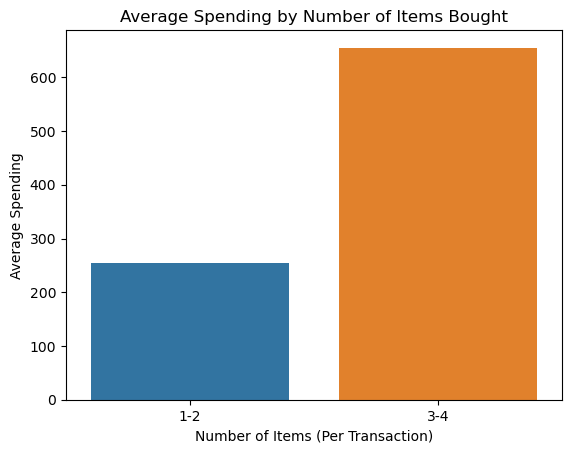

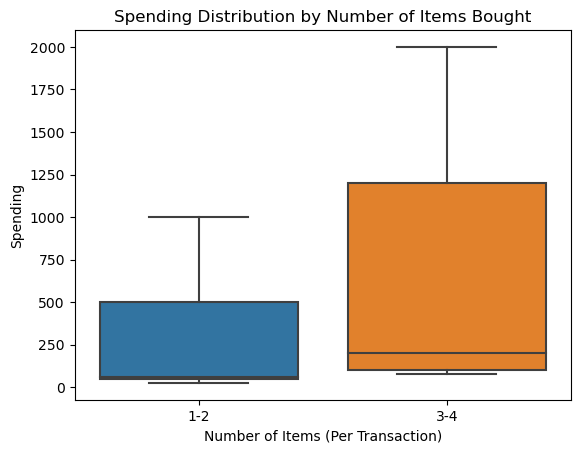

In [294]:
sns.barplot(data=transaction_data, x='Item Group', y='Total Spending', ci=None)
plt.title("Average Spending by Number of Items Bought")
plt.xlabel("Number of Items (Per Transaction)")
plt.ylabel("Average Spending")
plt.show()

sns.boxplot(data=transaction_data, x='Item Group', y='Total Spending')
plt.title("Spending Distribution by Number of Items Bought")
plt.xlabel("Number of Items (Per Transaction)")
plt.ylabel("Spending")
plt.show()


In [296]:
# What insights can be gleaned from the distribution of product prices within each category?

price_distribution = cleaned_data.groupby('Product Category')['Total Amount'].agg(['min', 'max', 'mean', 'median', 'std']).reset_index()
print(price_distribution)



  Product Category   min     max        mean  median         std
0           Beauty  25.0  2000.0  467.475570   120.0  563.612788
1         Clothing  25.0  2000.0  443.247863   120.0  550.695917
2      Electronics  25.0  2000.0  458.786550   150.0  567.540150


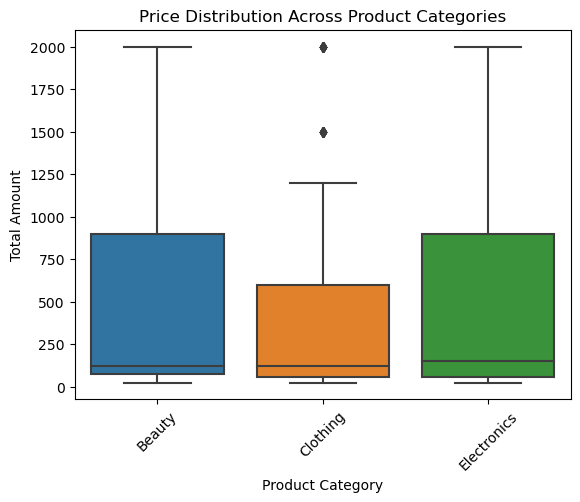

In [301]:
sns.boxplot(data=cleaned_data, x='Product Category', y='Total Amount')
plt.title('Price Distribution Across Product Categories')
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.show()
